In [30]:
import json
import pandas
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 8})
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
cell_type = 'FS'
cell_path = 'fs/derived/'
cell_id = '180418_FS5'
cell = cell_path + cell_id
prefix = 'ECall'
channels = {'current': 6, 'voltage': 7}
liquid_junction_potential = 9.5

In [3]:
def plot_traces(path, prefix, protocol, channels, recordings,
                vshift=0, title=None, figsize=(12, 8)):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=figsize)
    ax1.set_ylabel('Voltage (mV)')
    ax2.set_ylabel('Current (pA)')
    ax2.set_xlabel('Time (ms)')
    if not title:
        title = protocol
    fig.suptitle(title)
    if len(recordings) > 1:
        color_cycle = [plt.cm.Blues(i) 
                       for i in np.linspace(0.3, 1, len(recordings))**2]
        ax1.set_prop_cycle('color', color_cycle)
        ax2.set_prop_cycle('color', color_cycle)
    for rec in reversed(recordings):
        fullname = path + '/' + prefix + '_' + protocol \
            + '_ch' + str(channels['current']) + '_' + str(rec) + '.dat'
        data = np.loadtxt(fullname)
        time = data[:, 0]
        current = data[:, 1]
        fullname = path + '/' + prefix + '_' + protocol \
            + '_ch' + str(channels['voltage']) + '_' + str(rec) + '.dat'
        data = np.loadtxt(fullname)
        voltage = data[:, 1] - vshift
        ax1.plot(time, voltage)
        ax2.plot(time, current)
    return fig


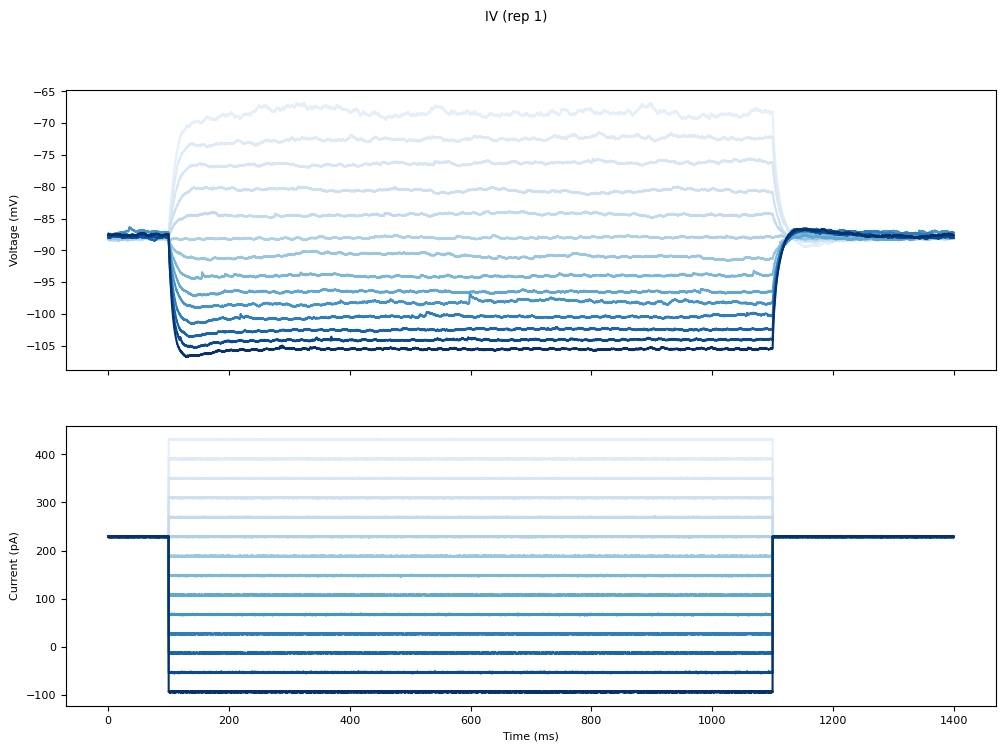

In [5]:
protocol = 'IV'
feature_protocol = protocol
repetitions = [range(1855, 1869)]

for recordings in repetitions[0:1]:
    fig = plot_traces(cell, prefix, protocol, channels, recordings, 
                      title=feature_protocol + ' (rep %d)' % len(repetitions),
                     vshift=liquid_junction_potential)
    plt.show()

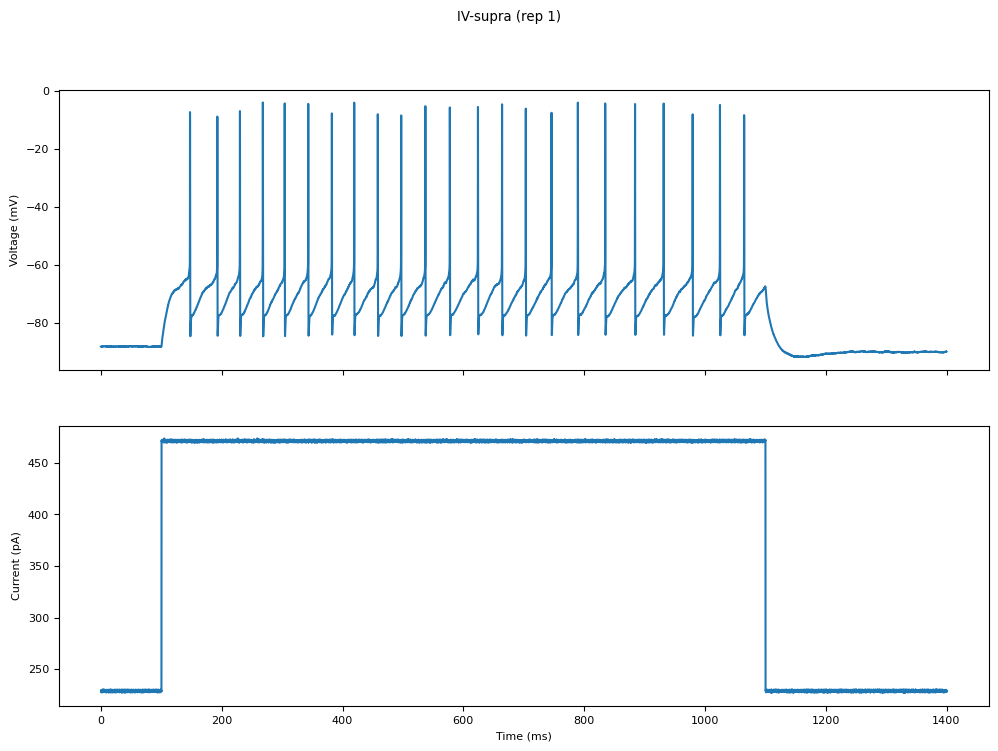

In [6]:
protocol = 'IV'
feature_protocol = 'IV-supra'
repetitions = [[1869]]

for recordings in repetitions[0:1]:
    fig = plot_traces(cell, prefix, protocol, channels, recordings, 
                      title=feature_protocol + ' (rep %d)' % len(repetitions),
                     vshift=liquid_junction_potential)
    plt.show()

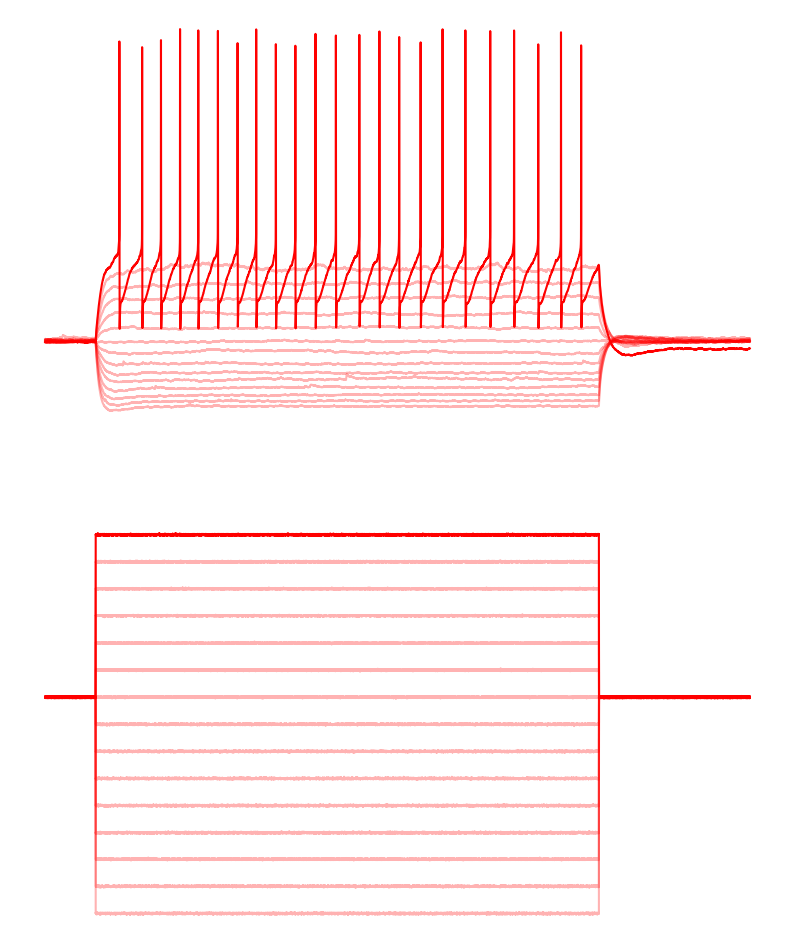

In [71]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(10, 12))

protocol_1 = 'IV'
feature_protocol_1 = protocol_1
repetitions_1 = [range(1855, 1869)]
path_1 = cell
prefix_1 = 'ECall'
channels = {'current': 6, 'voltage': 7}


for rec in  range(1855, 1869):

    fullname = path_1 + '/' + prefix_1 + '_' + protocol_1 \
    + '_ch' + str(channels['voltage']) + '_' + str(rec) + '.dat'
    data = np.loadtxt(fullname)
    time = data[:, 0]
    voltage = data[:, 1]
    ax1.plot(time,voltage, 'r', alpha=0.3)

    fullname = path_1 + '/' + prefix_1 + '_' + protocol_1 \
        + '_ch' + str(channels['current']) + '_' + str(rec) + '.dat'
    data = np.loadtxt(fullname)
    time = data[:, 0]
    current = data[:, 1]
    ax2.plot(time,current, 'r', alpha=0.3)


fullname = path_1 + '/' + prefix_1 + '_' + protocol_1 \
+ '_ch' + str(channels['voltage']) + '_' + str(1869) + '.dat'
data = np.loadtxt(fullname)
time = data[:, 0]
voltage = data[:, 1]
ax1.plot(time,voltage, 'r')

fullname = path_1 + '/' + prefix_1 + '_' + protocol_1 \
+ '_ch' + str(channels['current']) + '_' + str(1869) + '.dat'
data = np.loadtxt(fullname)
time = data[:, 0]
voltage = data[:, 1]
ax2.plot(time,voltage, 'r')


ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)



ax2.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)


